In [1]:
import spock
import random
import numpy as np
import rebound
import pandas as pd
from spock import simsetup
from spock import FeatureClassifier
import matplotlib.pyplot as plt

resTestThetaAlt  tests the min func

resTestTheta normal
res1e4Theta
resThetaData

In [2]:
ResDatapath = '../../cleanData/csvs/resonant/'
RandDatapath = '../../cleanData/csvs/random/'

data = pd.read_csv(ResDatapath+'resThetaData.csv')
#rand = pd.read_csv(RandDatapath+'rand1e4Theta.csv')

In [3]:
#data = pd.concat([res, rand], axis=0)

In [4]:
data.columns

Index(['Unnamed: 0.1', 'EMcrossnear', 'EMfracstdnear', 'EPstdnear',
       'MMRstrengthnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar',
       'MMRstrengthfar', 'threeBRfillfac', 'threeBRfillstd', 'MEGNO',
       'MEGNOstd', 'ThetaSTD12', 'ThetaSTD23', 'ThetaSTD12alt',
       'ThetaSTD23alt', 'Tsec', 'near', 'nearThetaSTD', 'nearThetaSTDalt',
       'InitialStable', 'Unnamed: 0', 'runstring', 'instability_time',
       'shadow_instability_time', 'Stable'],
      dtype='object')

In [5]:
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = np.sqrt(-np.log(1-(x**(-1))))
    return p1+p2
fillList =np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: 10**((x)+5.5), y))


In [6]:
import matplotlib as mpl

In [7]:
# fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
# vmi = 0.5
# vma = 1.75
# tag1 = 'ThetaSTD12'
# tag2 = 'ThetaSTD23'
# ax[0].scatter((data['threeBRfillfac']),(data['instability_time']), 
#            s=2, c=((data[tag1])), cmap="cool",
#            vmin=vmi,vmax=vma,alpha=.8)
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
#              ax=ax, orientation='vertical', label='ThetaSTD')

# # cbar = fig.colorbar(orientation="vertical", extend="both",
# #                     pad=0.05, shrink=1, aspect=20, format="%.3f")

# ax[0].scatter(fillList, y,s=4, c = 'red')
# ax[0].set_xlim([0,20])
# ax[0].set_ylim([1e4,2e9])
# ax[0].set_xlabel(" 3BR fill facture")
# ax[0].set_ylabel("log instability time")
# ax[0].set_yscale('log')
# #cbar.set_label('close body conjunction angle std')
# ax[0].set_facecolor("black")
# ax[0].set_title('std of conjunction angle for inner planet pair')


# ax[1].scatter((data['threeBRfillfac']),(data['instability_time']), 
#            s=2, c=((data[tag2])), cmap="cool",
#            vmin=vmi,vmax=vma,alpha=.8)

# ax[1].scatter(fillList, y,s=4, c = 'red')
# ax[1].set_xlim([0,20])
# ax[1].set_xlabel(" 3BR fill facture")
# ax[1].set_ylabel("log instability time")
# ax[1].set_title('std of conjunction angle for outer planet pair')

# #cbar.set_label('close body conjunction angle std')
# ax[1].set_facecolor("black")

In [8]:
data[['ThetaSTD12','ThetaSTD23','nearThetaSTD']].describe()

,ThetaSTD12,ThetaSTD23,nearThetaSTD
count,102497.000000,102497.000000,102497.000000
mean,1.381532,1.405822,1.405822
std,0.639090,0.623811,0.623811
min,0.004862,0.003875,0.003875
25%,0.887443,0.993977,0.993977
50%,1.733832,1.741690,1.741690
75%,1.826694,1.827202,1.827202
max,2.939410,2.989579,2.989579


In [61]:
data['near'].describe()

count     102497
unique         2
top       [1, 2]
freq       51547
Name: near, dtype: object

In [9]:
temp = data[(data['threeBRfillfac'] > 3)]

In [10]:
temp['near'].describe()

count       8981
unique         2
top       [2, 3]
freq        7608
Name: near, dtype: object

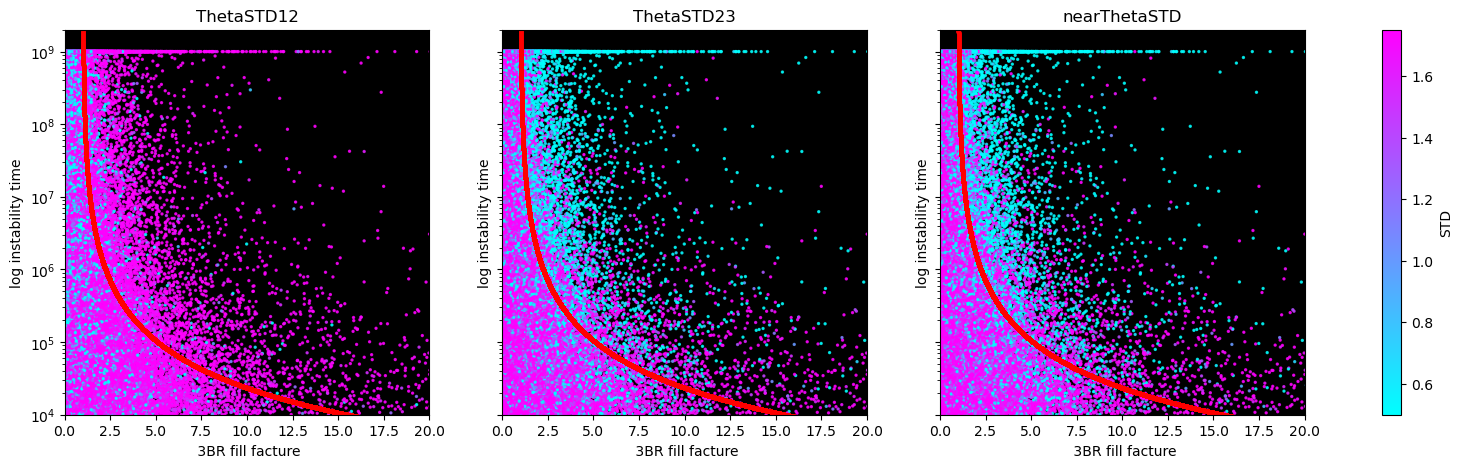

In [50]:
#ax = plt.axes()
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
vmi = 0.5
vma = 1.75

tags =[ 'ThetaSTD12', 'ThetaSTD23','nearThetaSTD']

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='STD')
for i, e in enumerate(tags):
    ax[i].scatter((data['threeBRfillfac']),(data['instability_time']), 
           s=2, c=((data[e])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)
    ax[i].scatter(fillList, y,s=4, c = 'red')
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([1e4,2e9])
    ax[i].set_xlabel(" 3BR fill facture")
    ax[i].set_ylabel("log instability time")
    ax[i].set_yscale('log')
    #cbar.set_label('close body conjunction angle std')
    ax[i].set_facecolor("black")
    ax[i].set_title(e)




In [9]:
specific = data[(data['threeBRfillfac'] > 10) & (data['instability_time']>9e8)]

In [ ]:
specific.iloc[1]

Unnamed: 0.1                       3655
EMcrossnear                    0.060492
EMfracstdnear                  0.020156
EPstdnear                      0.003623
MMRstrengthnear                  0.2468
EMcrossfar                     0.355667
EMfracstdfar                   0.015169
EPstdfar                        0.00116
MMRstrengthfar                      NaN
threeBRfillfac                11.008904
threeBRfillstd                 0.380586
MEGNO                          1.995883
MEGNOstd                       0.000801
ThetaSTD12                     1.776154
ThetaSTD23                     0.235652
ThetaSTD12alt                  1.823561
ThetaSTD23alt                  2.961927
Tsec                        3614.656361
InitialStable                       1.0
Unnamed: 0                         3655
runstring                   0003663.bin
instability_time           1000000000.0
shadow_instability_time    1000000000.0
Stable                             True
nearTheta                      1.776154


In [24]:
sim = rebound.Simulation(ResDatapath+"clean_initial_conditions.bin", snapshot=37919)

In [34]:
def threeBRFillFac(sim, trio):
    '''calculates the 3BR filling factor in acordance to petit20'''
    ps = sim.particles
    b0, b1,b2,b3 = ps[0], ps[trio[0]], ps[trio[1]], ps[trio[2]]
    m0,m1,m2,m3 = b0.m,b1.m,b2.m,b3.m
    ptot = None

    #semim
    a12 =(b1.a/b2.a)
    a23 = (b2.a/b3.a)

    #equation 43
    d12 = 1- a12
    d23 = 1- a23

    #equation 45
    d = (d12*d23)/(d12+d23)

    #equation 19
    mu12 = b1.P/b2.P
    mu23 = b2.P/b3.P

    #equation 21
    eta = (mu12*(1-mu23))/(1-(mu12*mu23))

    #equation 53
    eMpow2 = (m1*m3 + m2*m3*(a12**(-2))+m1*m2*(a23**2)*((1-eta)**2))/(m0**2)

    #equation 59
    dov = ((42.9025)*(eMpow2)*(eta*((1-eta)**3)))**(0.125)


    #equation 60

    ptot = (dov/d)**4

    return abs(ptot)

In [35]:
threeBRFillFac(sim,[1,2,3])

8.04292738544188

/home/ethadhani/summerSPOCK/datafilt/graphThetaSTD.ipynb

maybe try mod pi and see if that fixed the issue

In [27]:
specific = data[(data['threeBRfillfac'] > 15) & (data['instability_time']>9e8)]

In [12]:
specific['Unnamed: 0.1']

27216    27216
37919    37919
43946    43946
54691    54691
64067    64067
65167    65167
96975    96975
Name: Unnamed: 0.1, dtype: int64


In [ ]:
27216
37919
43946
54691
64067
65167
96975

In [28]:
ps = sim.particles

Nu12 = ps[1].P/ps[2].P
Nu23 = ps[2].P/ps[3].P
masses = [ps[1].m,ps[2].m,ps[3].m]

Eta = Nu12*(1-Nu23)/(1-Nu12*Nu23)
Nu = 1/(1/(1/Nu12-1)+1/(1-Nu23))

In [29]:
def nu_eta_to_nus(nu,eta):
    return eta/(eta+nu),(1-eta-nu)/(1-eta)

In [30]:
def _fillingfactor_th(nu,eta,masses,m0=1.):
    "Auxiliary function to compute theoretical overlap limit"
    m1,m2,m3 = masses
    nu12,nu23 = nu_eta_to_nus(nu,eta)
    plsep = 1/(1/(1-nu12**(2/3))+1/(1-nu23**(2/3)))
    Mfac = (m1*m3/m0**2*(eta**2/nu12**(4/3)+1+(1-eta)**2*nu23**(4/3)))**.5

    return np.nan_to_num(Mfac*(38/np.pi)**.5*4*2**.5/3*(eta*(1-eta))**1.5/plsep**4-1)

In [32]:
from scipy.optimize import fsolve

In [33]:
def nu_overlaplimit(etas,masses,m0=1.):
    nuguess = 0.05*np.ones_like(etas)
    nuov = fsolve(_fillingfactor_th,nuguess,args=(etas,masses,m0))
    return nuov

In [ ]:
nu_overlaplimit(etas,masses,m0=1.)

In [31]:
_fillingfactor_th(Nu, Eta, masses)

0.3729319482290152